In [4]:
import pandas as pd
from pandas import json_normalize

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from tqdm import tqdm
import time 


In [6]:
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [7]:
tracks = pd.read_pickle("track_data_for_cluster.pkl")
tracks.head(2)

track.name  \
0  Vois sur ton chemin - Techno Mix   
1                        Summertime   

                                         artist_dict                      id  \
0  {0: {'external_urls': {'spotify': 'https://ope...  31nfdEooLEq7dn3UMcIeB5   
1  {0: {'external_urls': {'spotify': 'https://ope...  0gMTEHzNIyvxikxyUFFJxO   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.634   0.824  2.0    -3.394   0.0        0.047        0.0908   
1         0.756   0.647  6.0    -5.488   0.0        0.159        0.2790   

   instrumentalness  liveness  valence    tempo  
0          0.071100     0.119    0.371  137.959  
1          0.000005     0.102    0.464  134.995

In [8]:
tracks.columns

Index(['track.name', 'artist_dict', 'id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

In [9]:
X_tracks = tracks[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]

In [10]:
import pickle 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tracks)

pickle.dump(scaler, open('standardScaler.p', 'wb'))

X_tracks_prep = scaler.transform(X_tracks)


In [11]:
X_tracks_prep

array([[ 0.42470093,  1.05635439, -0.89578248, ..., -0.36987654,
        -0.17772272,  0.67834228],
       [ 1.02358138,  0.47641107,  0.22786031, ..., -0.48659863,
         0.16813292,  0.58404333],
       [ 1.57337326,  0.11927083, -0.05305039, ..., -0.56830409,
         1.16479219, -0.53033225],
       ...,
       [ 1.29356846,  0.33224437,  0.508771  , ..., -0.56143809,
         1.13876004, -0.21072117],
       [ 1.33283931, -0.9161082 ,  1.07059239, ..., -0.4454026 ,
         1.38420598,  0.65693095],
       [ 1.05303451, -0.1756156 ,  1.63241379, ..., -0.58821551,
         2.04244736, -0.68816527]])

In [ ]:
# original_model = pickle.load(open('filename.p', 'rb'))

C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Domen\anaconda3\lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

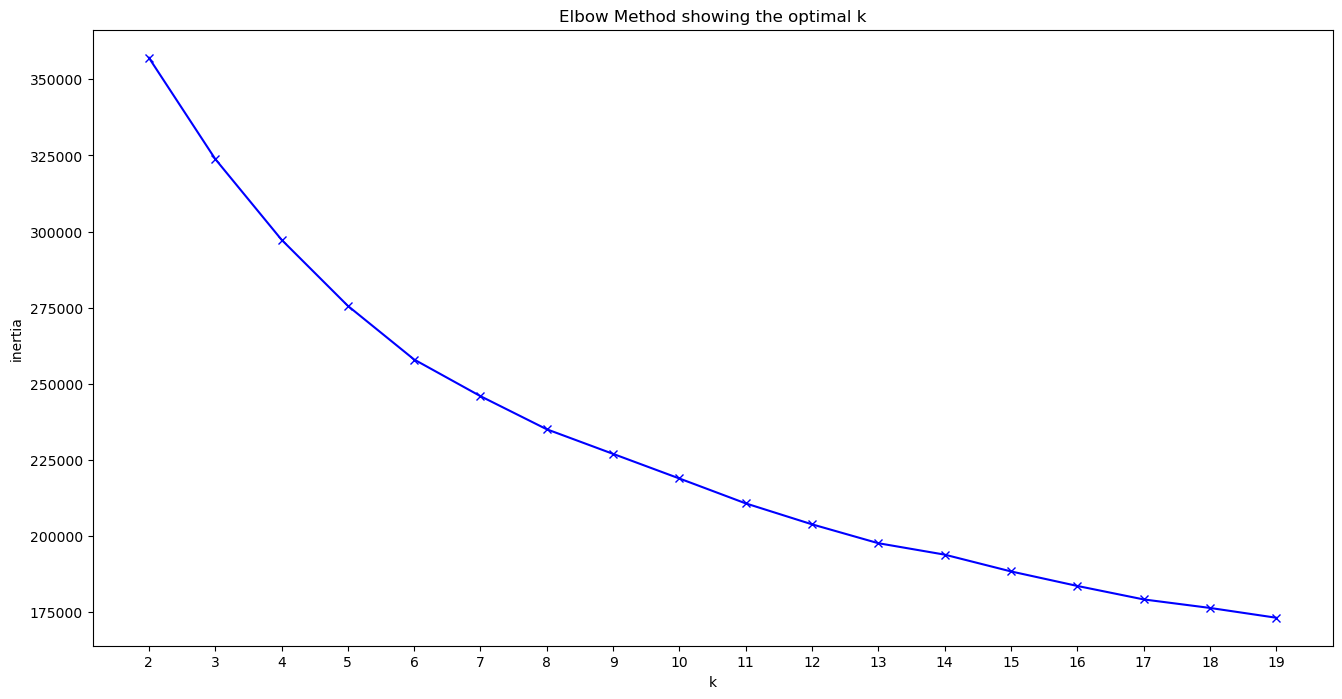

In [31]:
# choosing K fpr k means

from sklearn.cluster import KMeans

import numpy as np
K = range(2, 20)
inertia = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_tracks_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  6%|████▌                                                                              | 1/18 [00:24<07:02, 24.83s/it]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█████████▏                                                                         | 2/18 [00:48<06:23, 23.98s/it]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

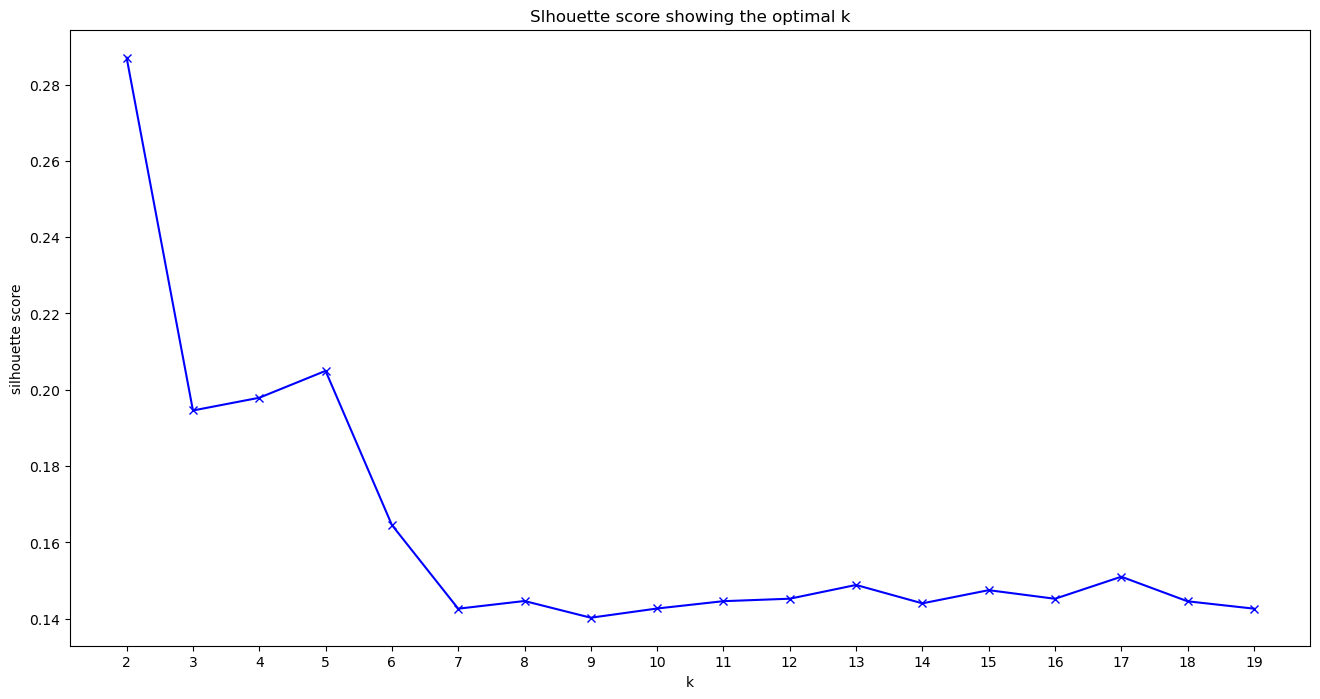

In [33]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_tracks_prep)
    silhouette.append(silhouette_score(X_tracks_prep, kmeans.predict(X_tracks_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [12]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_tracks_prep)

pickle.dump(kmeans, open('kmean_Model.p', 'wb'))

C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_tracks_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    16563
1    11558
2    13278
3     2246
4     2047
dtype: int64

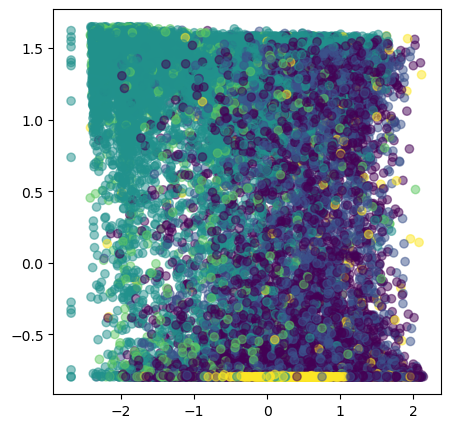

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(X_tracks_prep[:, 0], X_tracks_prep[:, 7], c=clusters,alpha=0.5)
plt.show()

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_tracks_prep)

PCA()

In [16]:
X_tracks_pca = pca.transform(X_tracks_prep)
X_tracks_pca

array([[-1.70324812,  0.02901596,  0.04371865, ..., -0.29868083,
        -0.06356511,  0.13952518],
       [-1.67115361, -0.7610407 ,  0.7998457 , ..., -0.43866971,
         0.03212558,  0.11932763],
       [-1.52886233, -1.30335604, -0.86245568, ..., -0.08243232,
         0.32123606,  0.03675981],
       ...,
       [-0.10971434, -1.32443672, -0.33121553, ...,  0.03811002,
        -0.46209776,  0.31644253],
       [-0.84957712, -1.81637707,  1.14573965, ...,  0.09709383,
         1.06772677, -0.29748279],
       [-0.9209797 , -1.87932312,  1.84075536, ...,  1.16393459,
         0.39205967, -0.60846409]])

In [ ]:
import seaborn as sns

df["y"] = clusters
df["comp_pca-1"] = X_tracks_pca[:,0]
df["comp-pca-2"] = X_tracks_pca[:,1]


plt.figure(figsize=(15 , 10))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("Paired", 5),
                data=df).set(title="Song Cluster plot using pca") 

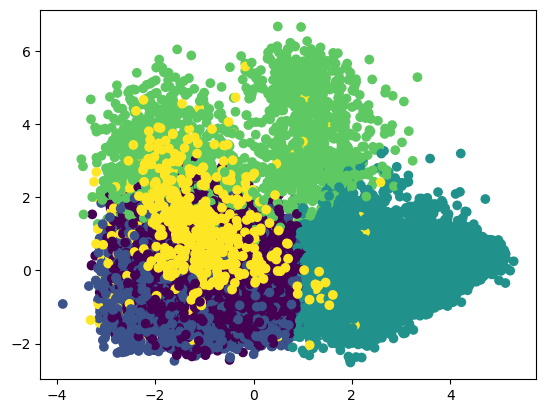

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X_tracks_pca[:,0],X_tracks_pca[:,1], c = clusters)



In [18]:
from sklearn.manifold import TSNE

In [21]:
X_tracks_prep[0]

array([ 0.42470093,  1.05635439, -0.89578248,  1.00983641, -1.30616633,
       -0.36224655, -0.90887225, -0.62178984, -0.36987654, -0.17772272,
        0.67834228])

In [32]:
tsne = TSNE(n_components = 2, perplexity = 5)

In [33]:
X_tracks_tsne = tsne.fit_transform(X_tracks_prep)

X_tracks_tsne

array([[ -21.026731,  -22.90149 ],
       [ -37.19975 ,  -56.96283 ],
       [ -89.38211 ,   17.065763],
       ...,
       [  35.46637 ,   36.907402],
       [ -18.269861, -103.2442  ],
       [  16.500887, -105.87553 ]], dtype=float32)

In [36]:
import seaborn as sns
df = pd.DataFrame()
df["y"] = clusters
df["comp-1"] = X_tracks_tsne[:,0]
df["comp-2"] = X_tracks_tsne[:,1]

# sns.scatterplot(x = X_tracks_tsne[:,0], X_tracks_tsne[:,1], data = X_tracks_tsne)

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

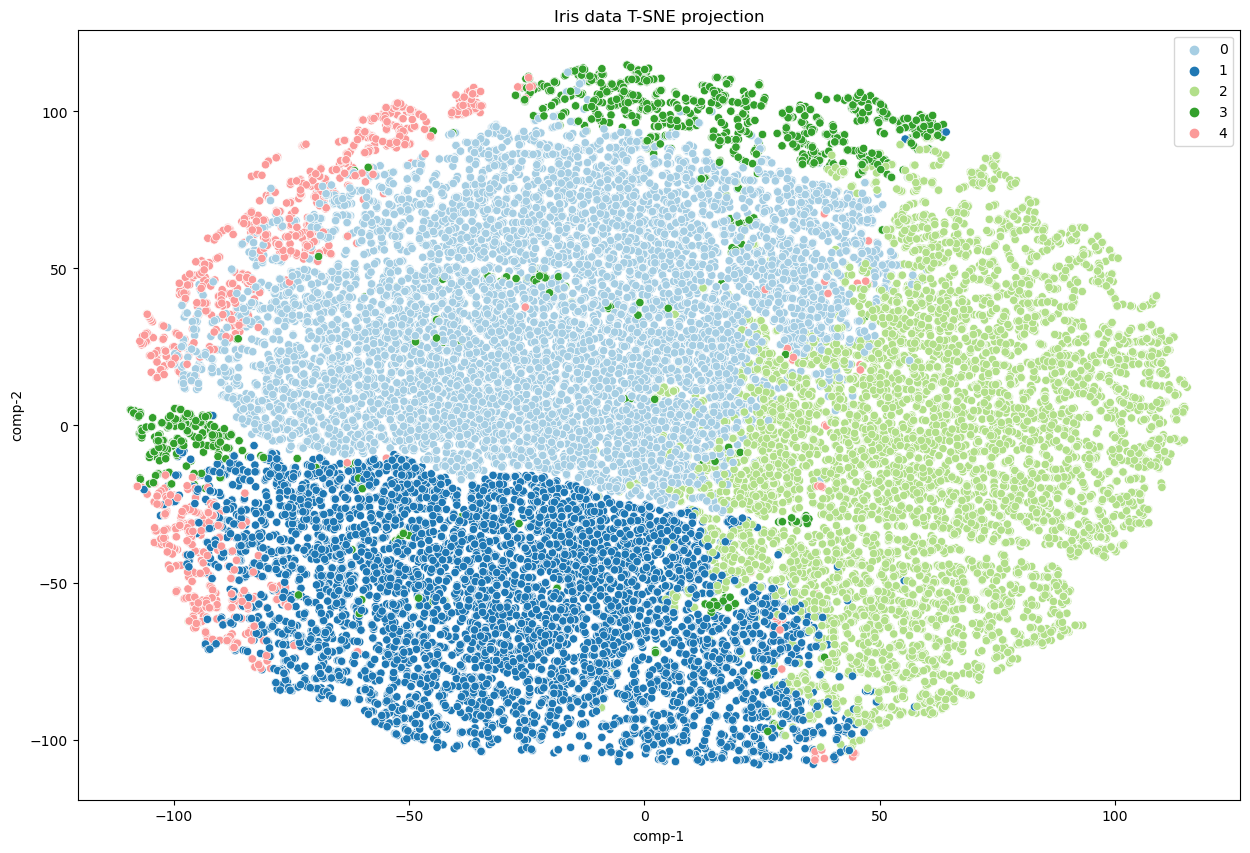

In [63]:


plt.figure(figsize=(15 , 10))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("Paired", 5),
                data=df).set(title="Iris data T-SNE projection") 

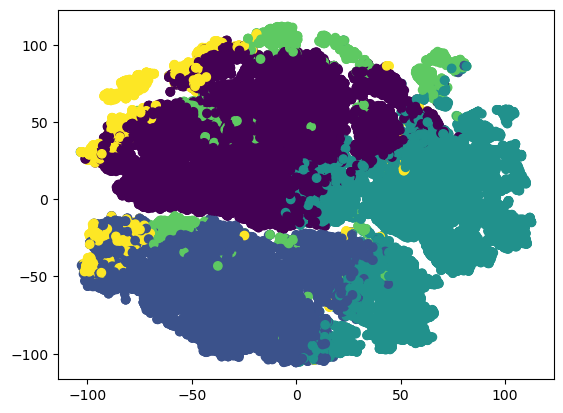

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X_tracks_tsne[:,0],X_tracks_tsne[:,1], c = clusters)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

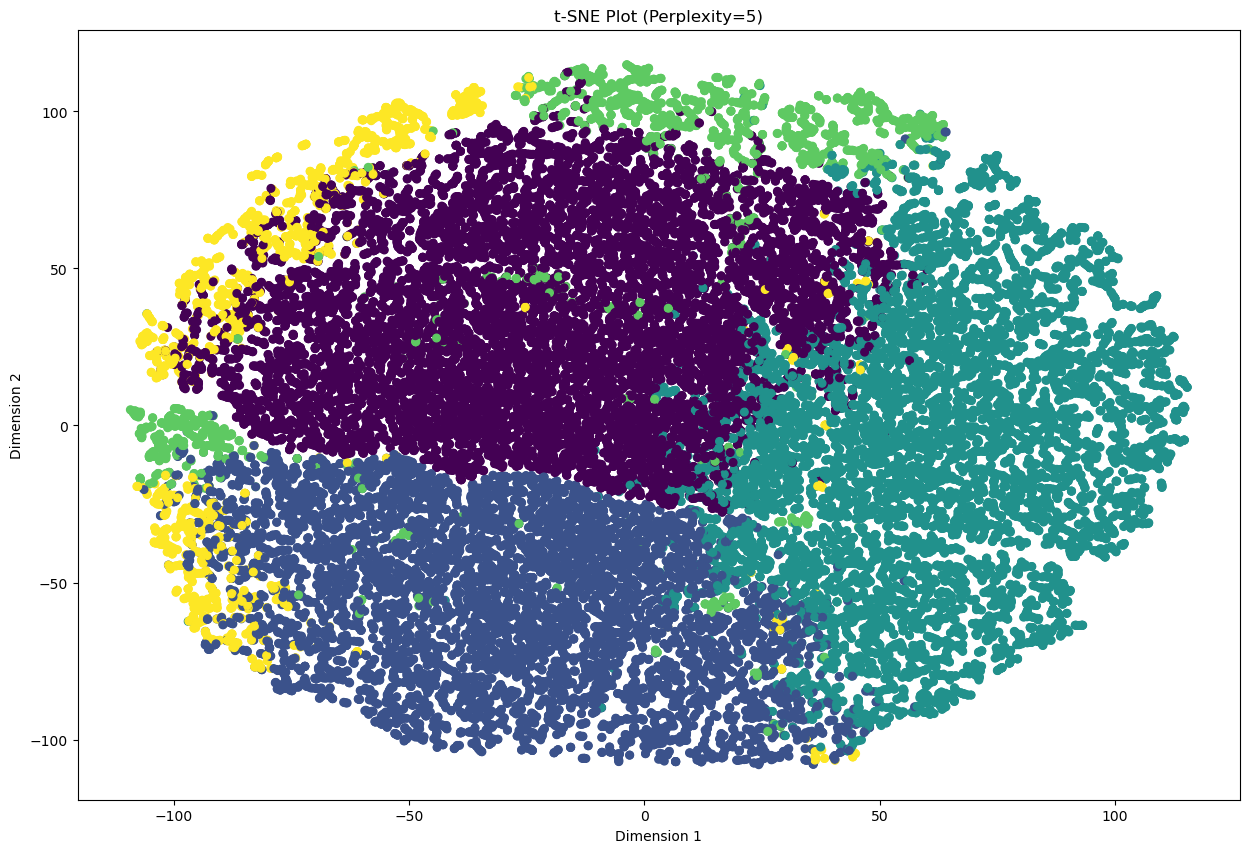

 20%|████████████████▌                                                                  | 1/5 [01:58<07:52, 118.25s/it]

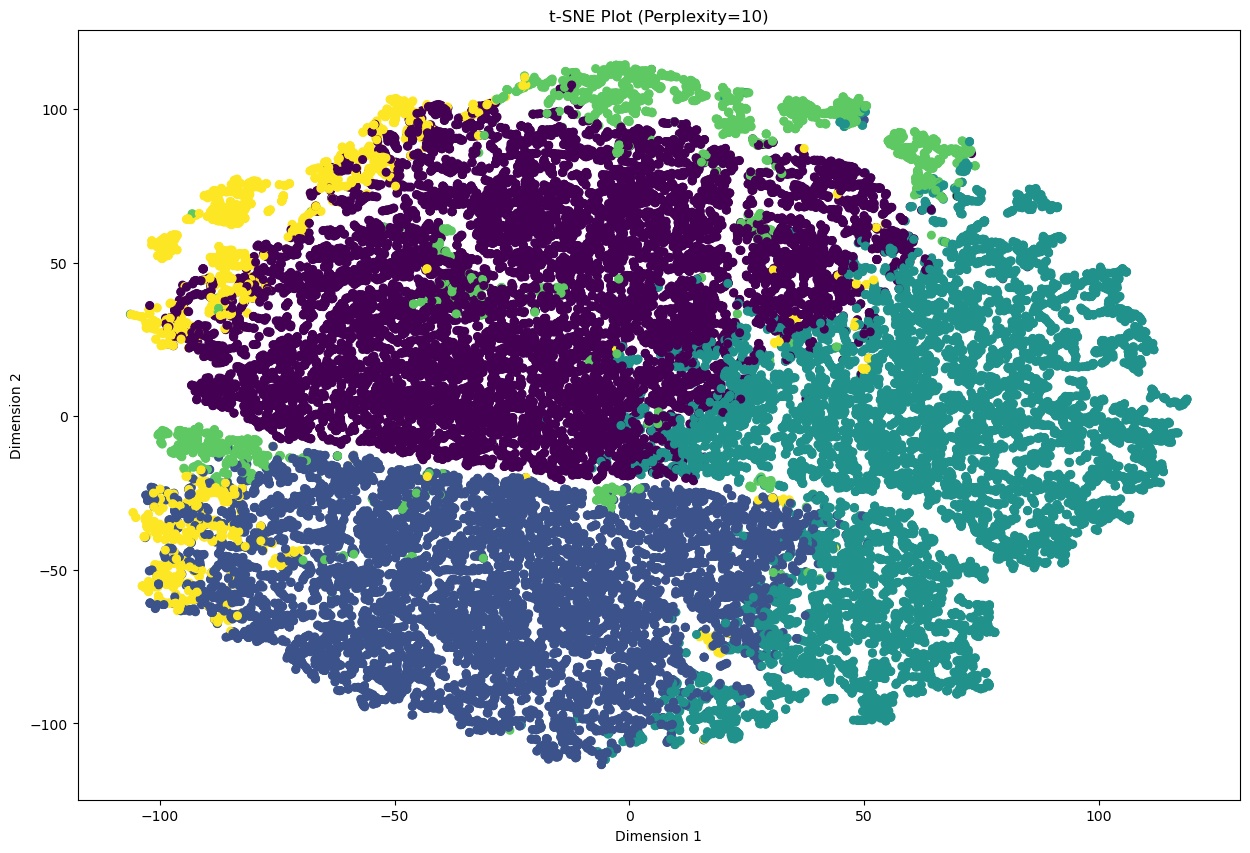

 40%|█████████████████████████████████▏                                                 | 2/5 [04:02<06:06, 122.05s/it]

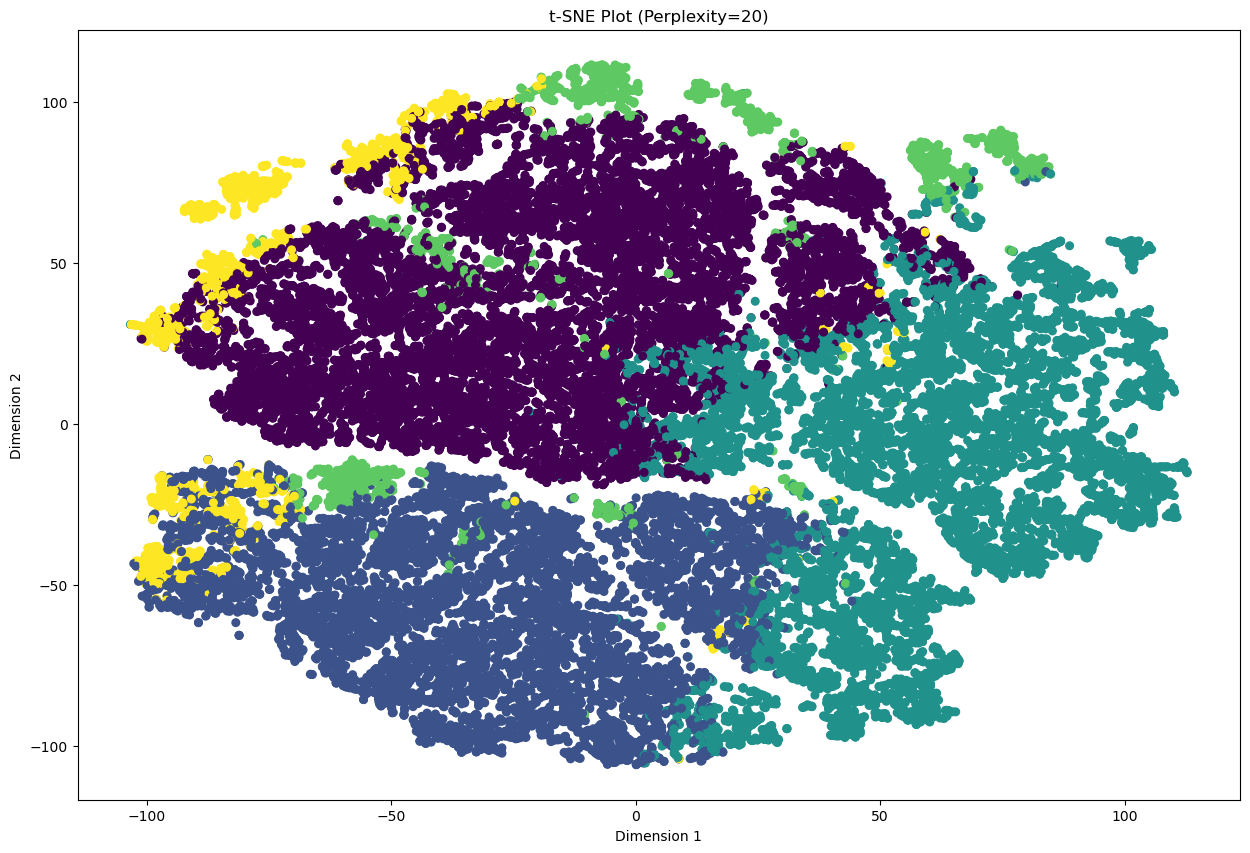

 60%|█████████████████████████████████████████████████▊                                 | 3/5 [06:42<04:38, 139.25s/it]

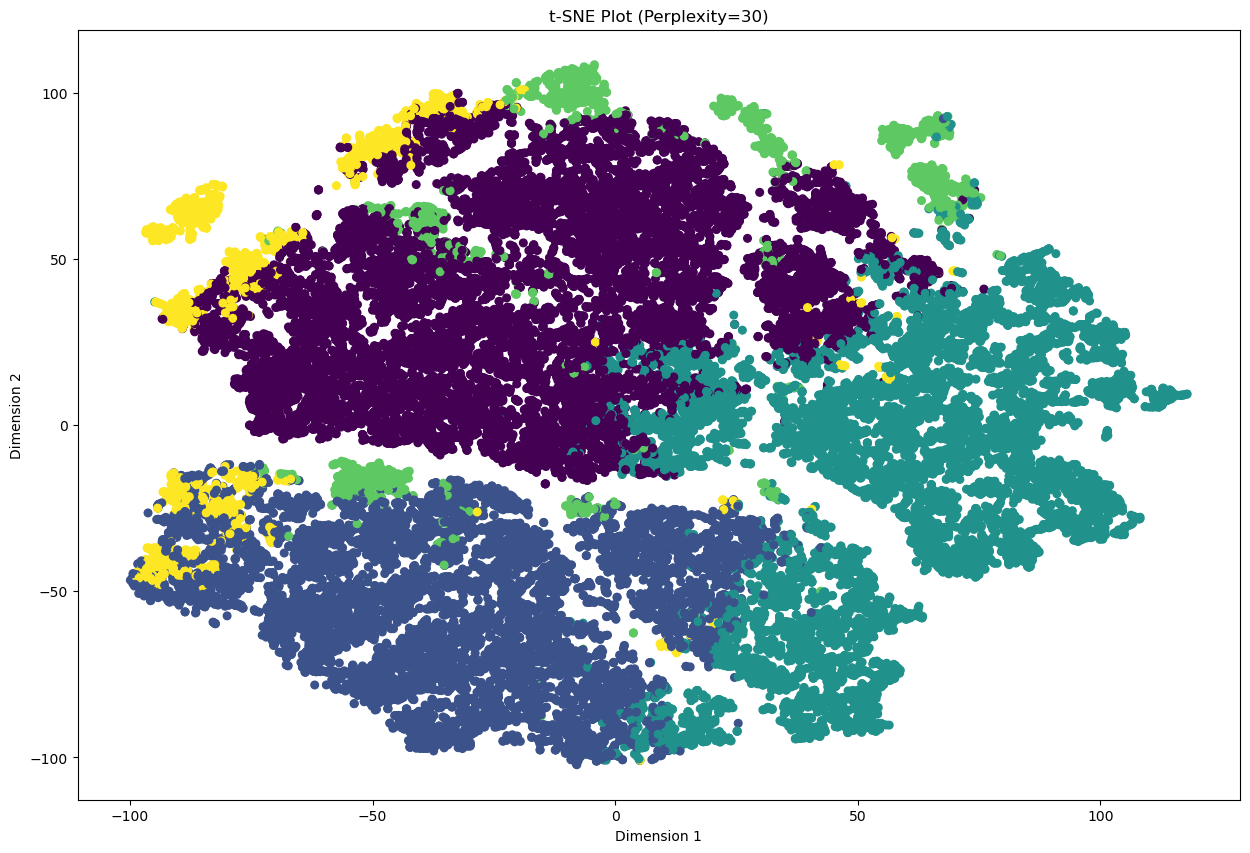

 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [09:16<02:24, 145.00s/it]

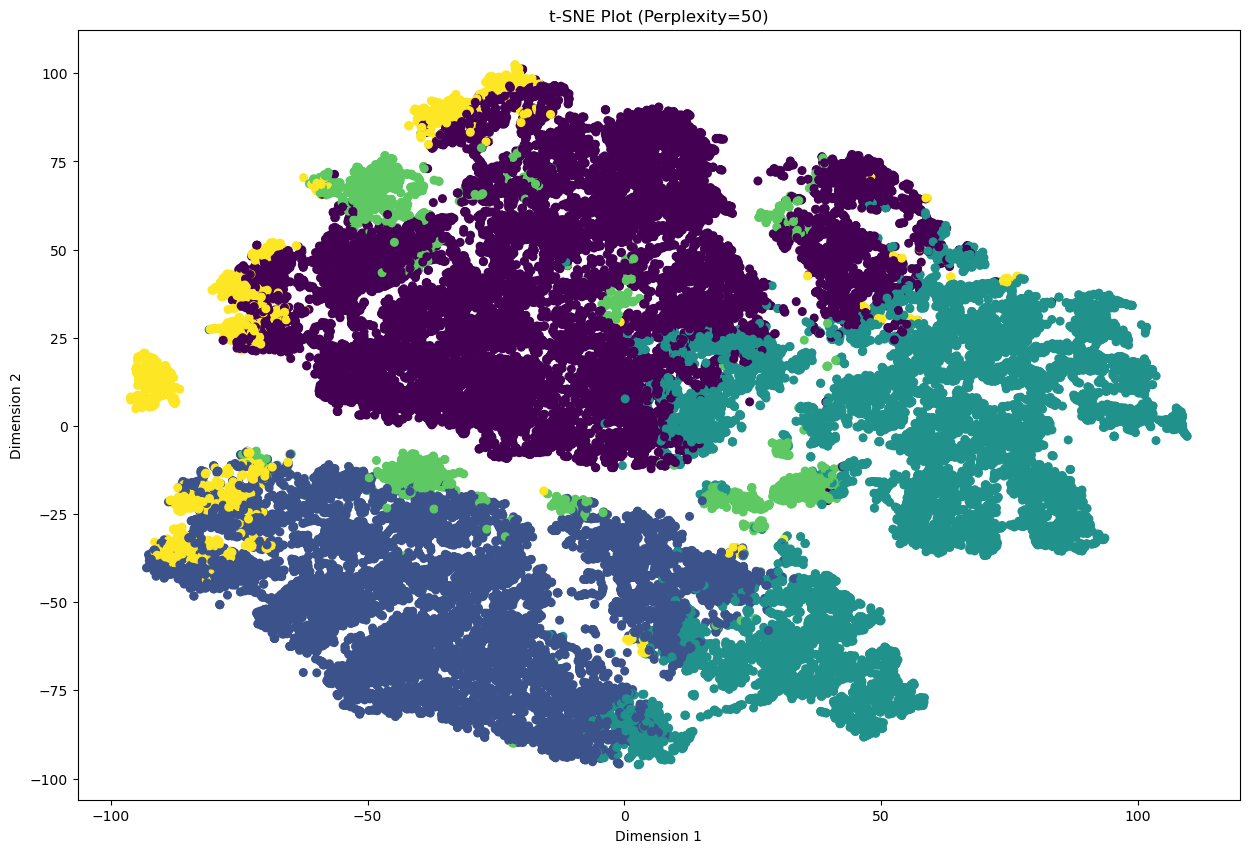

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [12:30<00:00, 150.05s/it]


In [30]:

# perplexity_values = [5, 10, 20, 30, 50]

# for perplexity in tqdm(perplexity_values):
#     # t-SNE-Modell erstellen
#     tsne = TSNE(n_components=2, perplexity=perplexity)

#     # t-SNE auf die Daten anwenden
#     X_tsne = tsne.fit_transform(X_tracks_prep)


#     plt.figure(figsize=(15 , 10))
#     plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='o', s=30, c = clusters)
#     plt.title(f't-SNE Plot (Perplexity={perplexity})')
#     plt.xlabel('Dimension 1')
#     plt.ylabel('Dimension 2')
#     plt.show()